In [82]:
#libraries
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [83]:
#get google data
google_path ="gplus/"

circles_list= list.files(google_path, pattern = "\\.circles")
length(circles_list)

[1] 132

## Question 18
    How many personal networks are there?

In [148]:
#try error: https://stackoverflow.com/questions/13613270/how-to-fix-the-error-in-r-of-no-lines-available-in-input

presonal_net_cnt=0

for (circle_file in circles_list){
    filename = paste(google_path,circle_file,sep="")
    circle_info = tryCatch(read.delim(filename,sep="\n",header=FALSE), error=function(e) NULL)
    
    if (!inherits(circle_info, 'try-error')) circle_info 
    
    if (length(unlist(circle_info)) > 2) {
        presonal_net_cnt = presonal_net_cnt +1  
    }
}
print(paste("How many personal networks (> 2 circles) are there?", presonal_net_cnt, sep=" "), quote=F)
print(paste("Total number of networks (.circles files)?", length(circles_list), sep=" "), quote=F)

[1] How many personal networks (> 2 circles) are there? 57
[1] Total number of networks (.circles files)? 132


## Question 19
    For the 3 personal networks (node ID given below), plot the in-degree and out- degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution? In this question, you should have 6 plots.

In [108]:
add_node = function(graph, new_node){
    g_new = add.vertices(graph,1,name=new_node)
    vcount_new = vcount(g_new)
    new_edge_lst = rep(0, 2*vcount_new)

    for (i in 1:length(new_edge_lst)) {
            if (i %% 2 == 0) { 
                new_edge_lst[i] = i/2 # old vertex
            }
            else {
                new_edge_lst[i] = vcount(g_new) # new vertex
            }
    }
    return (add_edges(g_new, new_edge_lst))
}

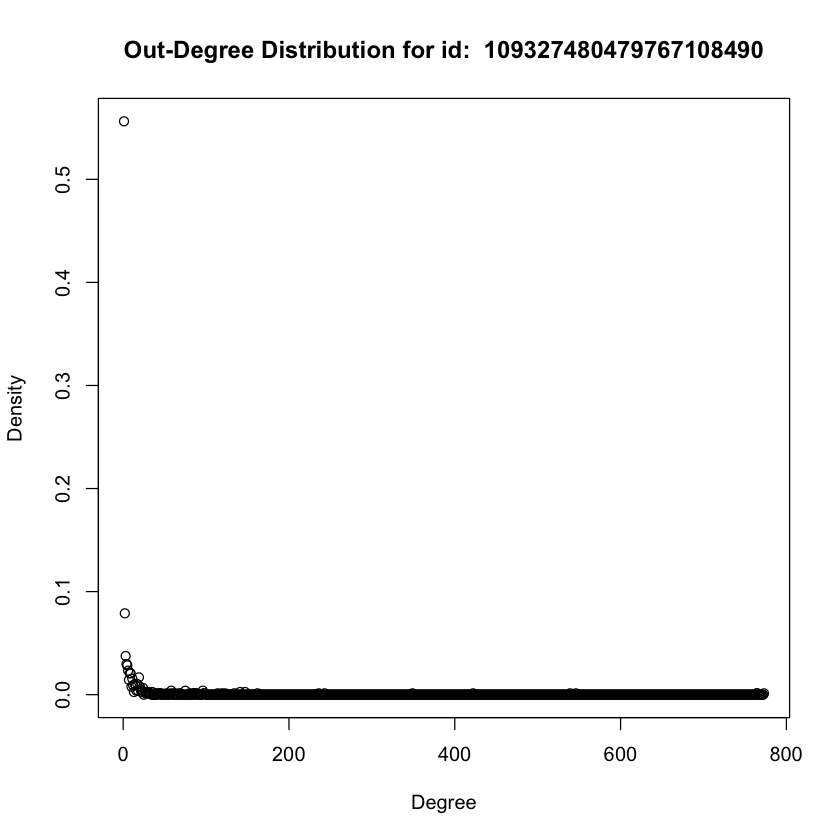

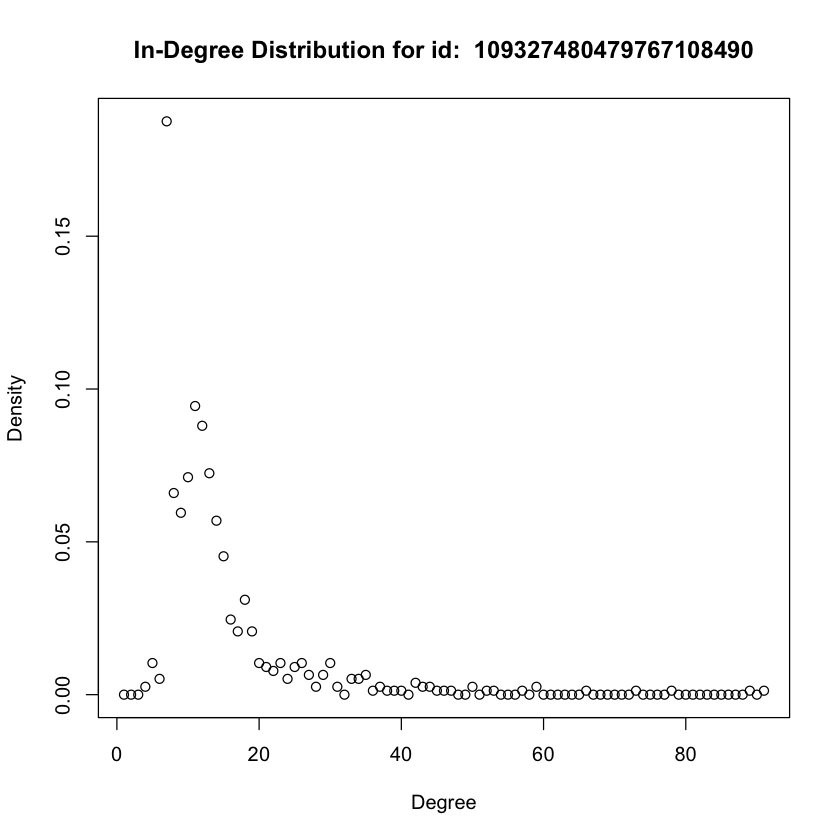

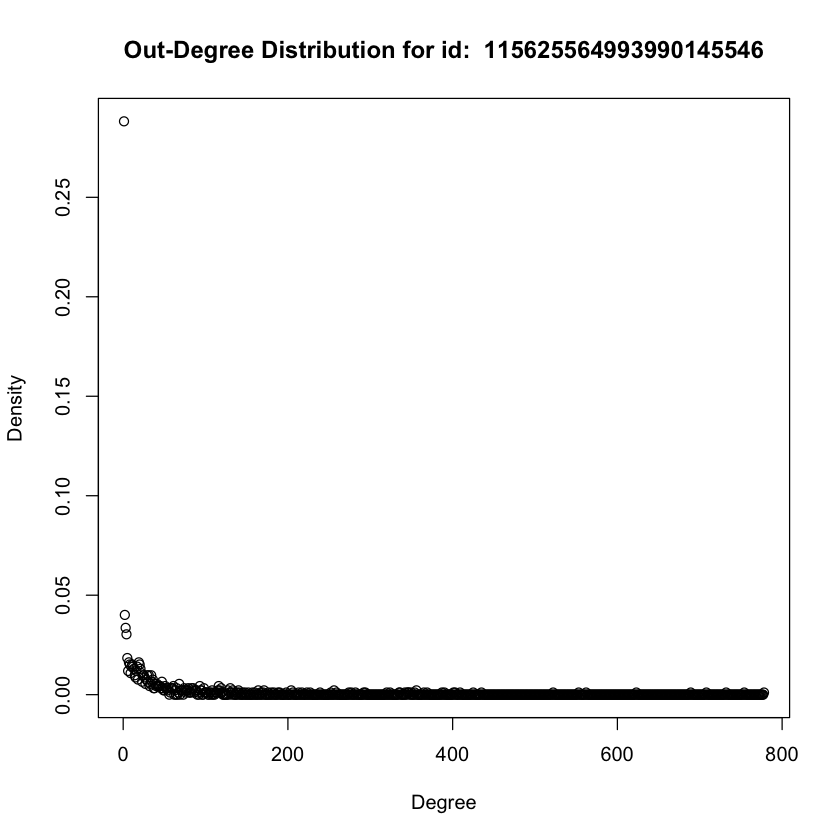

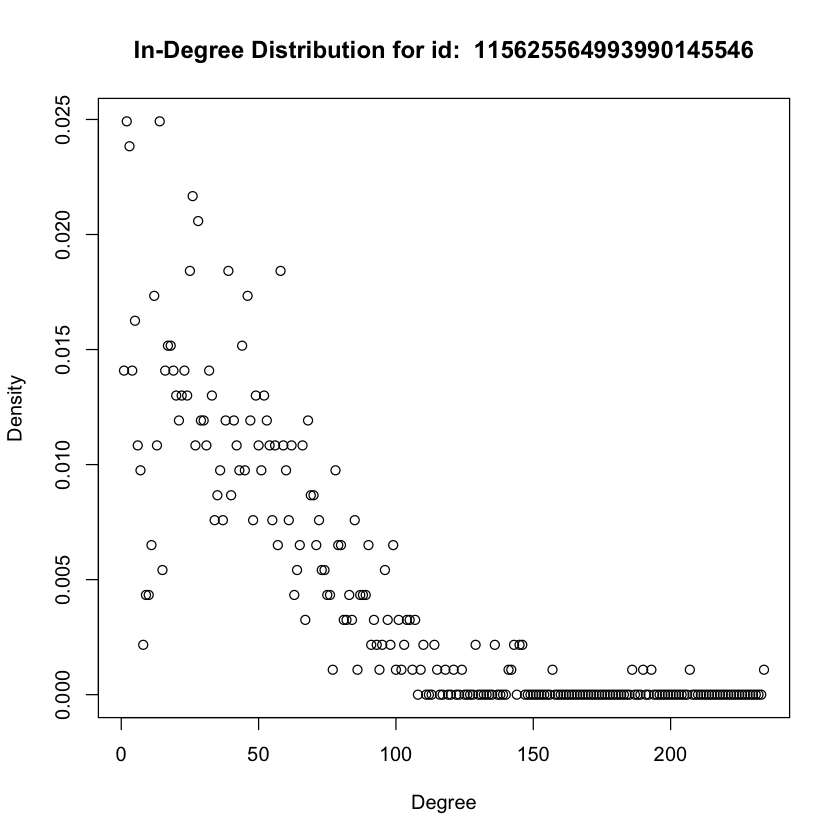

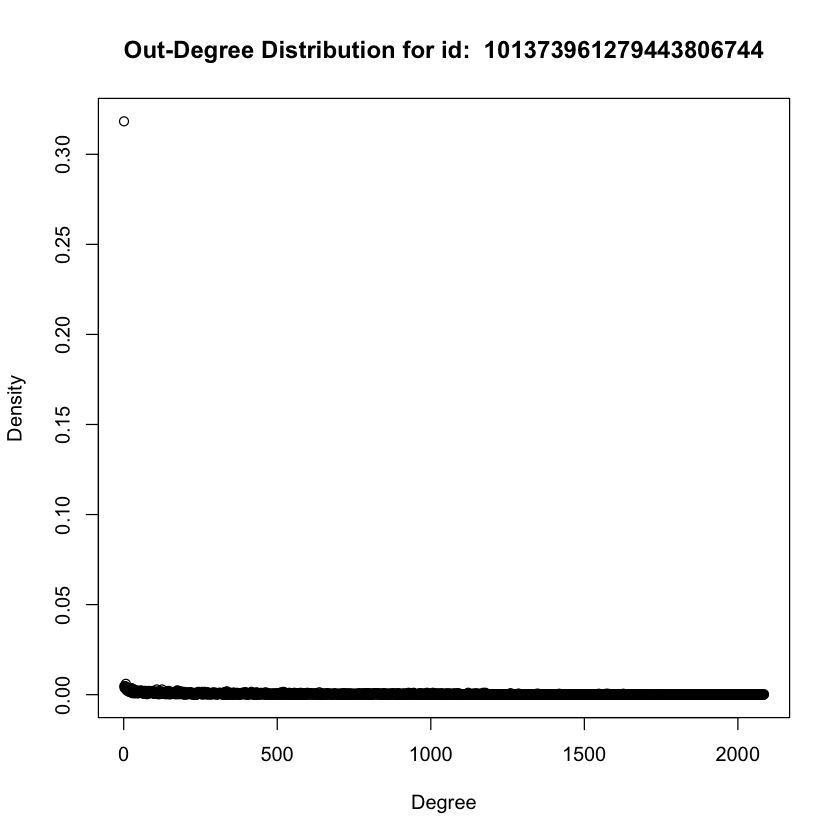

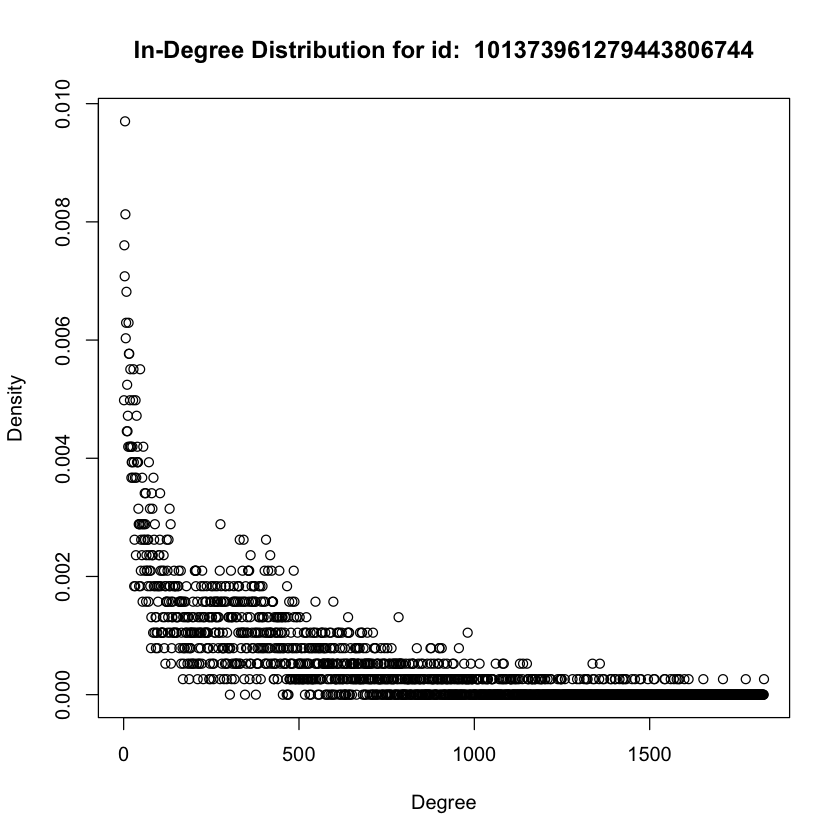

In [138]:
g_list=list()

ids = c('109327480479767108490' , 
        '115625564993990145546' ,
        '101373961279443806744')
i=1
for (id in ids){
    #    print(paste("-----",id,"-----"))
    edge_filename = paste(google_path, id, ".edges", sep="")
    edge_info = tryCatch(read.delim(edge_filename,sep="\n",header=FALSE)
                         , error=function(e) NULL)
    # graph of edge_info
    g <- read_graph(edge_filename,format="ncol",directed=TRUE)
    # need to add the ego node to the graph
    g_new <- add_node(g,id)
    g_list[[i]] = g_new
    i=i+1
    
    #plot degree distribution
    plot(degree.distribution(g, mode = "out")
         ,main=paste("Out-Degree Distribution for id: ",id)
         ,xlab="Degree", ylab="Density", type="p")           
    plot(degree.distribution(g, mode = "in")
         ,main=paste("In-Degree Distribution for id: ",id)
         ,xlab="Degree", ylab="Density", type="p")
    
}


In [139]:
length(g_list)

[1] 3

## Question 20
    For the 3 personal networks picked in Question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots.

[1] "id :  109327480479767108490 modularity measure:  0.252780646085739"


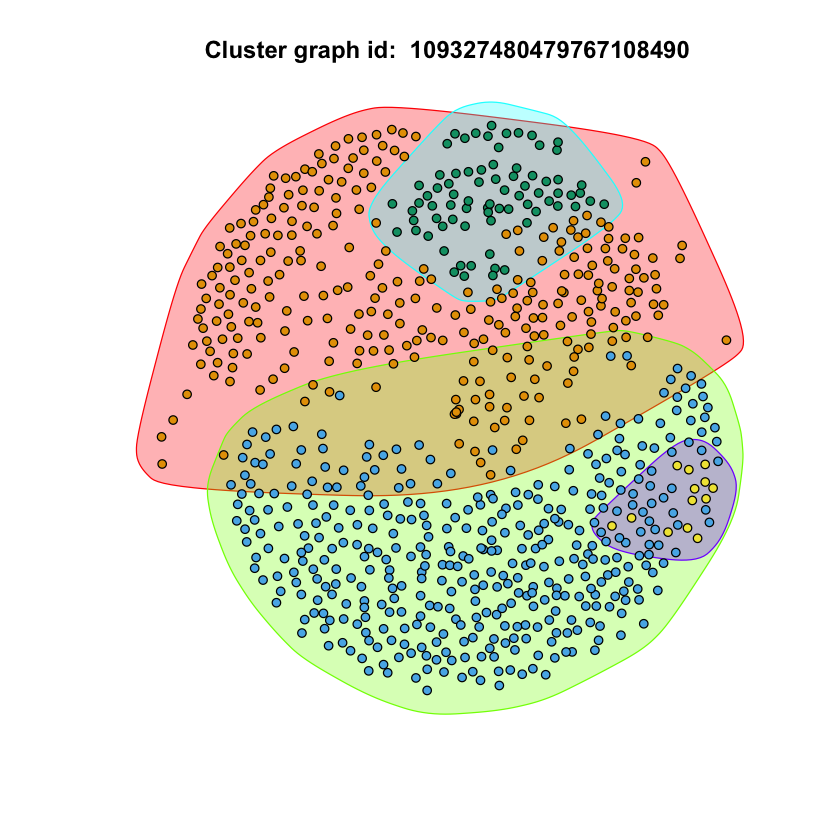

[1] "id :  115625564993990145546 modularity measure:  0.319473803043365"


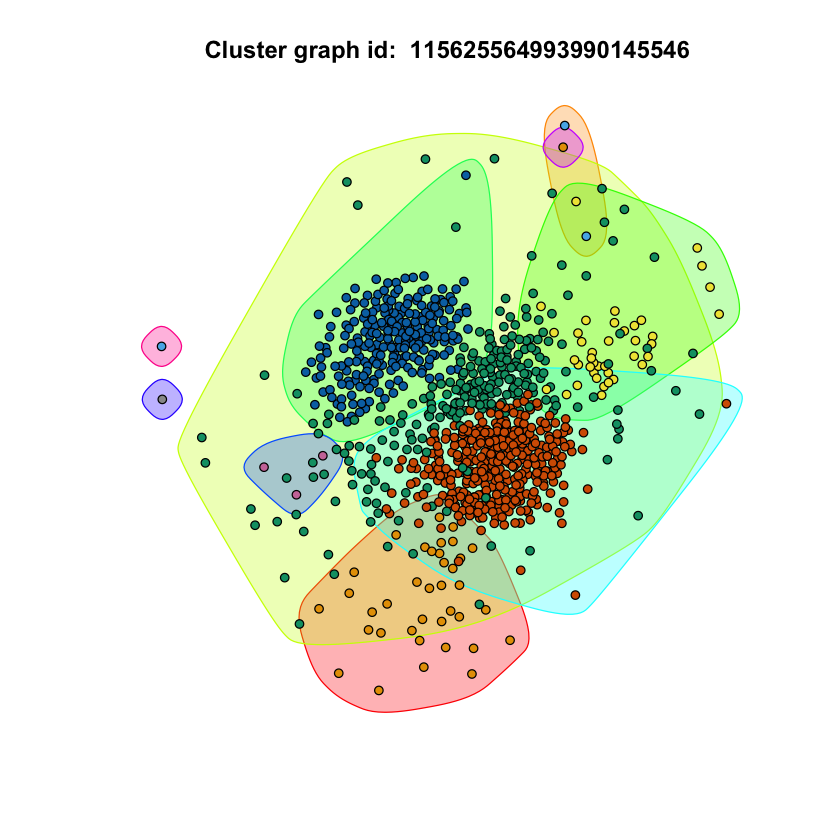

[1] "id :  101373961279443806744 modularity measure:  0.191093370318413"


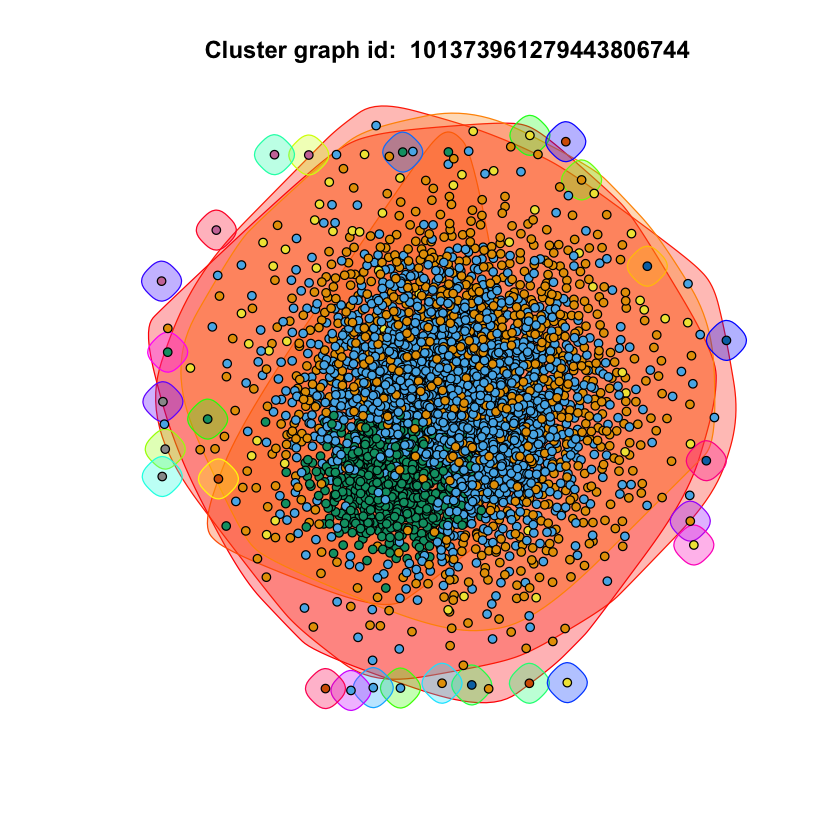

In [147]:

for(i in 1:length(g_list)){
    community <- cluster_walktrap(g_list[[i]])
    plot(community, g_list[[i]], 
#          layout = layout.fruchterman.reingold(graph), 
         edge.arrow.size=0, vertex.size=3, vertex.label=NA, 
         width=0,edge.arrow.mode=0,edge.lty=0,
         main=paste(" Cluster graph id: ", ids[i] ))
    
    print(paste("id : ", ids[i], "modularity measure: ", modularity(community)))
    
}


In [ ]:
# get number of circles and number of ppl in each circle

# Testing

In [56]:
 circle_split = strsplit(toString (circle_data_tst[1]), split="\t", fixed = FALSE)
 circle_d =   unlist(circle_split)
 circle_ids = circle_d[-1]